In [1]:
import pandas as pd
import seaborn as sns

import os

In [53]:
path = os.path.join('..','data','train_data_v2.csv')
train_data = pd.read_csv(path)

path = os.path.join('..','data','test_data.csv')
test_data = pd.read_csv(path)

In [54]:
train_data.dropna(axis=0, inplace=True)

In [55]:
train_data['len_q1'] = train_data.question1.apply(lambda x: len(x))
train_data['len_q2'] = train_data.question2.apply(lambda x: len(x))

test_data['len_q1'] = test_data.question1.apply(lambda x: len(x))
test_data['len_q2'] = test_data.question2.apply(lambda x: len(x))

/home/zenbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-64.16127141974383, 300)

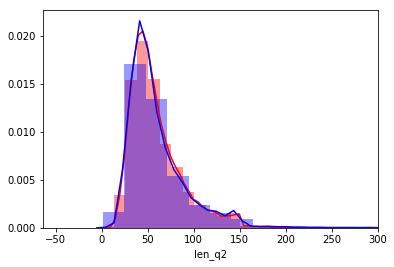

In [56]:
ax = sns.distplot(train_data.len_q1, hist=True, norm_hist=False, color='red')
sns.distplot(train_data.len_q2, hist=True, norm_hist=False, color='blue', ax=ax)
ax.set_xlim(right=300)

/home/zenbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-66.30187032240745, 300)

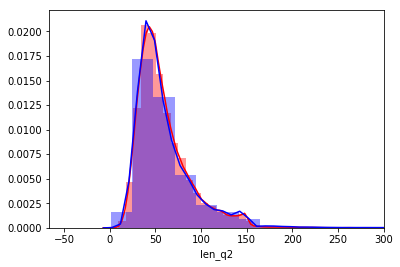

In [57]:
ax = sns.distplot(test_data.len_q1, hist=True, norm_hist=False, color='red')
sns.distplot(test_data.len_q2, hist=True, norm_hist=False, color='blue', ax=ax)
ax.set_xlim(right=300)

In [73]:
print(len(train_data))

323160


In [70]:
'''
This function will determine which is the largest length of the question (1 or 2)
that does not contain any relevant information (is_duplicate == 1)
'''
def get_min_cut(df, col):
    cut = 0
    for i in range(20):
        if any(df[col <= i].is_duplicate.values):
            return i - 1

In [72]:
cut_length_q1 = get_min_cut(train_data, train_data.len_q1)
cut_length_q2 = get_min_cut(train_data, train_data.len_q2)

In [74]:
train_data = train_data[train_data.len_q1 > cut_length_q1]
train_data = train_data[train_data.len_q2 > cut_length_q2]

In [75]:
print(len(train_data))

323085


In [83]:
'''
This function will determine which is the smallest length of the question (1 or 2)
that does not contain any relevant information (is_duplicate == 1)
'''
def get_max_cut(df, col):
    cut = 0
    for i in reversed(range(2000)):
        if any(df[col >= i].is_duplicate.values):
            return i + 1

In [85]:
cut_length_q1 = get_max_cut(train_data, train_data.len_q1)
cut_length_q2 = get_max_cut(train_data, train_data.len_q2)

In [86]:
train_data = train_data[train_data.len_q1 < cut_length_q1]
train_data = train_data[train_data.len_q2 < cut_length_q2]

In [87]:
print(len(train_data))

322889


In [ ]:
train_data.set_index('id', inplace=True)

In [91]:
train_data.drop(columns=['len_q1', 'len_q2'], inplace=True)

In [92]:
path = os.path.join('..','data','train_data_v3.csv')
train_data.to_csv(path)